# Categorical Features (discrete features)

- non-numeric values
- part of feature engineering

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

SyntaxError: invalid syntax (<ipython-input-4-ac4de401bb9c>, line 4)

In [2]:
pwd = os.getcwd()
data = os.path.join(pwd, "data.csv")
df = pd.read_csv(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df["Fare"].value_counts(ascending=False)

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64

In [37]:

#appears that no meaningful categorical data
df["Fare"].value_counts(ascending=False).count()

248

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

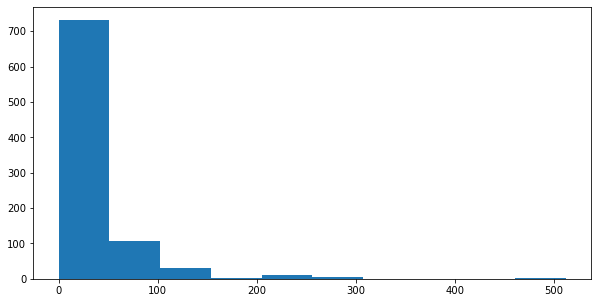

In [103]:
plt.figure(figsize=(10,5))
plt.hist(df["Fare"])

(array([316., 186., 137.,  62.,  19.,  35.,  20.,  19.,  31.,  13.]),
 array([ 0.  ,  9.35, 18.7 , 28.05, 37.4 , 46.75, 56.1 , 65.45, 74.8 ,
        84.15, 93.5 ]),
 <BarContainer object of 10 artists>)

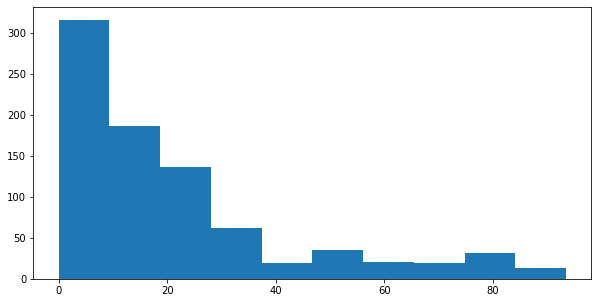

In [104]:
plt.figure(figsize=(10,5))
under100_fare = df[df["Fare"]<=100]
plt.hist(under100_fare["Fare"])

(array([24.,  9.,  9.,  8.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([106.425  , 147.01542, 187.60584, 228.19626, 268.78668, 309.3771 ,
        349.96752, 390.55794, 431.14836, 471.73878, 512.3292 ]),
 <BarContainer object of 10 artists>)

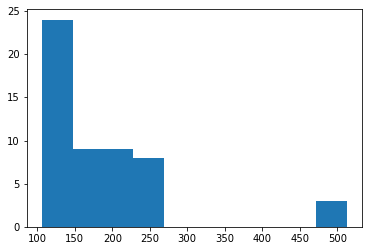

In [32]:
above100_fare = df[df["Fare"]>=100]
plt.hist(above100_fare["Fare"])

In [41]:
cat_features = df[["Pclass", "Sex"]]

In [39]:
pd.get_dummies(df["Pclass"])

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [42]:
pd.get_dummies(cat_features)

,Pclass,Sex_female,Sex_male
0,3,0,1
1,1,1,0
2,3,1,0
3,1,1,0
4,3,0,1
...,...,...,...
886,2,0,1
887,1,1,0
888,3,1,0
889,1,0,1


In [43]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(df[["Pclass","Sex"]])
ohe.get_feature_names()

array(['x0_1', 'x0_2', 'x0_3', 'x1_female', 'x1_male'], dtype=object)

In [55]:
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(df[["Sex"]])
ohe.get_feature_names()

array(['x0_female', 'x0_male'], dtype=object)

In [57]:
ohe.fit_transform(df[["Pclass","Sex"]])

array([[0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       ...,
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.]])

In [58]:
ohe.fit_transform(df[["Pclass","Sex"]]).shape

(891, 5)

In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [88]:
ct = ColumnTransformer([
    ("onehot", OneHotEncoder(sparse=False),["Pclass", "Sex"]),
    ("scaling", StandardScaler(),["Fare"])
])

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [89]:
X = df[["Pclass", "Sex", "Fare"]]
y = df[["Survived"]]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [91]:
X_train

,Pclass,Sex,Fare
105,3,male,7.8958
68,3,female,7.9250
253,3,male,16.1000
320,3,male,7.2500
706,2,female,13.5000
...,...,...,...
835,1,female,83.1583
192,3,female,7.8542
629,3,male,7.7333
559,3,female,17.4000


In [92]:
ct.fit(X_train)

ColumnTransformer(transformers=[('onehot', OneHotEncoder(sparse=False),
                                 ['Pclass', 'Sex']),
                                ('scaling', StandardScaler(), ['Fare'])])

In [93]:
X_train_trans = ct.transform(X_train)

In [94]:
X_test_trans = ct.transform(X_test)

In [96]:
logreg = LogisticRegression()
logreg.fit(X_train_trans, y_train)
logreg.score(X_test_trans, y_test)

/Users/royceto/anaconda3/envs/myenv/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7802690582959642

In [98]:
ct.named_transformers_

{'onehot': OneHotEncoder(sparse=False), 'scaling': StandardScaler()}

In [5]:
plt.figure(figsize=(10,5))
plt.hist(df["Fare"], color="blue")
plt.title("Distribution of Fares")
plt.xlabel("fare")
plt.ylabel("no. of passenger")

NameError: name 'plt' is not defined

In [6]:
plt.figure(figsize=(10,5))
under100_fare = df[df["Fare"]<=100]
plt.hist(under100_fare["Fare"], color="blue")
plt.title("Distribution of Fares <=100")
plt.xlabel("fare")
plt.ylabel("no. of passenger")

NameError: name 'plt' is not defined

In [ ]:
plt.figure(figsize=(10,5))
above100_fare = df[df["Fare"]>100]
plt.hist(above100_fare["Fare"],color="blue")
plt.title("Distribution of Fares >100")
plt.xlabel("fare")
plt.ylabel("no. of passenger")